To install the "Carboseq SIWAA API" package from the main branch of the git repo:

In [1]:
remotes::install_gitlab(repo='record/carboseqsiwaa', host='forgemia.inra.fr')

from URL https://forgemia.inra.fr/api/v4/projects/12001/repository/archive.tar.gz?sha=HEAD



curl  (5.2.1 -> 5.2.2 ) [CRAN]
rjson (NA    -> 0.2.22) [CRAN]


Installing 2 packages: curl, rjson

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpaQdV7L/remotes1693a00b7a1/carboseqsiwaa-HEAD-3137fda2fd96b18cead08734a93158ff10c6aabc/DESCRIPTION’ ... OK
* preparing ‘carboseqsiwaa’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘carboseqsiwaa_0.0.0.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



To enable the "Carboseq SIWAA API" package

In [2]:
library('carboseqsiwaa')

To configure the job where :
* the API_KEY enable an access to the remote cluster
* the CARBOSEQ_WORKFLOW_ID specify the remote simulation workflow
* the HISTORY_NAME gives a name to a remote storage area
* the INPUT_DIR is where to find the csv files
* the OUTPUT_DIR is where to store the rdata file hosting the results

In [3]:
siwaaenv = createSiwaaEnv(API_KEY='XXXXXXXXXXXXXXXXXXXXXXXXXXXXX',
                          CARBOSEQ_WORKFLOW_ID='32c9385265d8ab1a',
                          HISTORY_NAME='carboseqWF', # <- it is recommanded to give a name for each job..as unique as possible
                          INPUT_DIR='input/400Sites',
                          OUTPUT_DIR='output')

Given the job configuration named "siwaaenv", here we upload the data to the remote cluster.
In return we get an "anchor" named "ret$input_data_info" to the uploaded datas. 

In [4]:
ret <- uploadCSVs(env=siwaaenv)
input_data_info <- ret$input_data_info
message <- ret$message

In [5]:
message

[1] "[uploadCSVs] : ... [uploadCSVs] Zip input/400Sites folder ... [uploadCSVs] Upload the resulting .zip input file ... [uploadCSVs] The returned input_data_info will be required to run simulations (by tool or workflow)."

Given the job configuration named "siwaaenv" , the "chunck_size" and the input data anchor "input_data_info" we launch the simulation.
In return we get an "anchor" to the result of the job "ret$output_data_info".

In [6]:
ret <- runWorkflow(env=siwaaenv, input_data_info=input_data_info,
                   chunck_size='100')
output_data_info = ret$output_data_info
output_data_identified = ret$output_data_identified
invocation_info = ret$invocation_info
message = ret$message

cat("output_data_identified: ", output_data_identified, "\n")

output_data_identified:  TRUE 


Given the job configuration named "siwaaenv" and the remote output data "anchor" "output_data_info",
we launch a waiter command waiting indefinitely he results to be computed.
In return we get the "anchor" that will enable to upload the results "ret$data_info"

In [7]:
ret = waitSimsResults(env=siwaaenv, data_info=output_data_info)
output_data_info = ret$data_info # DON'T FORGET to refresh output_data_info !!!
message <- ret$message
end <- ret$end
data_ready <- ret$data_ready

In [8]:
cat("end: ", end, " ** ", "data_ready: ", data_ready, "\n")

end:  TRUE  **  data_ready:  TRUE 


Given the job configuration named "siwaaenv" and the remote output data "anchor" "output_data_info",
we save the results to a file available from "ret$filepath"

In [9]:
ret <- saveResults(env=siwaaenv, data_info=output_data_info)
output_file_path <- ret$filepath
message <- ret$message

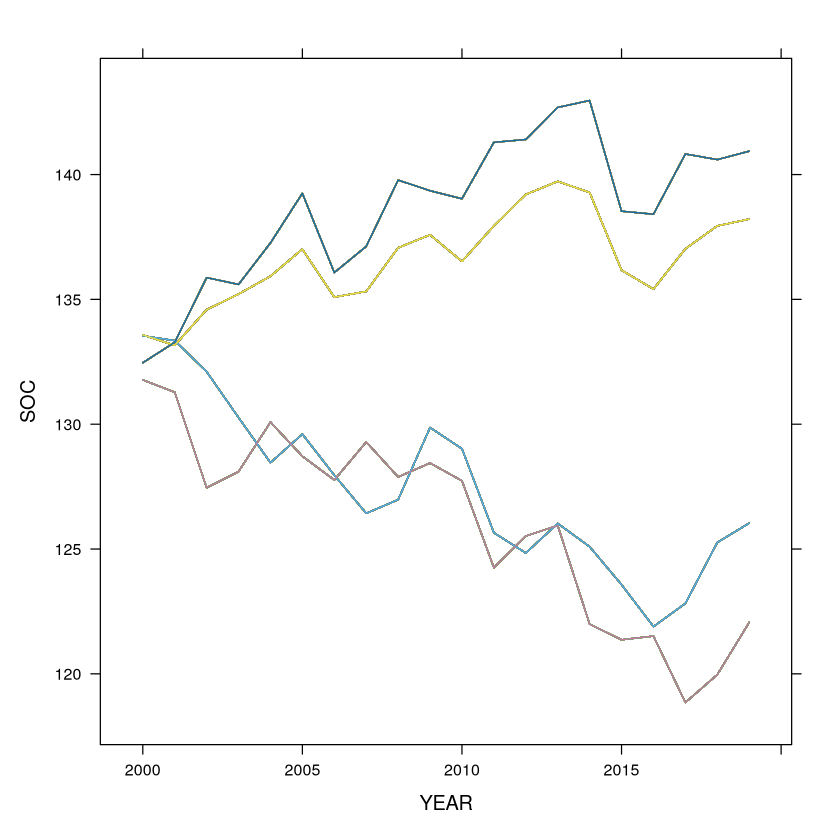

In [10]:
if (output_file_path != ""){
    load(output_file_path)
    lattice::xyplot(SOC~YEAR, groups = ID, data = res, type = "l")
}

In [11]:
str(res)

Classes ‘data.table’ and 'data.frame':	8000 obs. of  4 variables:
 $ ID     : num  1 1 1 1 1 1 1 1 1 1 ...
 $ ID_SUCC: num  1 1 1 1 1 1 1 1 1 1 ...
 $ YEAR   : num  2000 2001 2002 2003 2004 ...
 $ SOC    : num  134 133 132 130 128 ...
 - attr(*, ".internal.selfref")=<externalptr> 
